In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Medicine_Details.csv")

In [3]:
data.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [4]:
# data cleaning, checking for missing values
data.isnull().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

## Project step 1: Gain insights into the factors that influence medicine effectiveness and patient satisfaction

In [7]:
# Feature Engineering & creating new feature
# Calculate the percentage of positive reviews 

data['Positive_Review_%'] = data['Excellent Review %'] + data['Average Review %']

In [12]:
# Calculate the percentage of negative reviews

data['Negative_Review_%'] = data['Poor Review %']

In [14]:
# Review ratio

data['Positive_to_Negative_Ratio'] = data['Positive_Review_%'] / (data['Negative_Review_%'] + 1)

In [16]:
# Revew score

data['Review_Score'] = (data['Excellent Review %'] * 2 + data['Average Review %']) / 3
data['Review_Score']

0        33.333333
1        43.000000
2        39.333333
3        29.666667
4        35.000000
           ...    
11820    55.666667
11821    26.666667
11822    41.666667
11823     0.000000
11824     0.000000
Name: Review_Score, Length: 11825, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


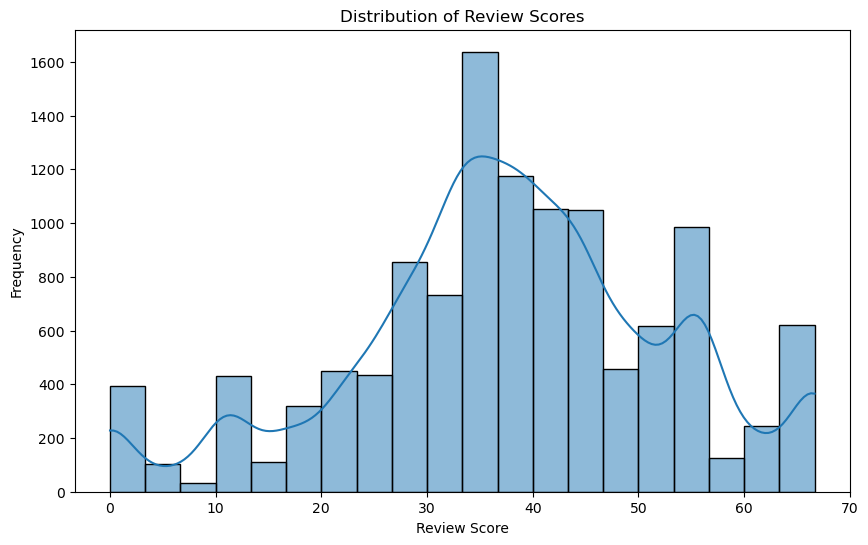

In [18]:
# Exploratory Data Analysis (EDA.) Distribution of Review Scores by histogram visualization

plt.figure(figsize=(10, 6))
sns.histplot(data['Review_Score'], bins=20, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

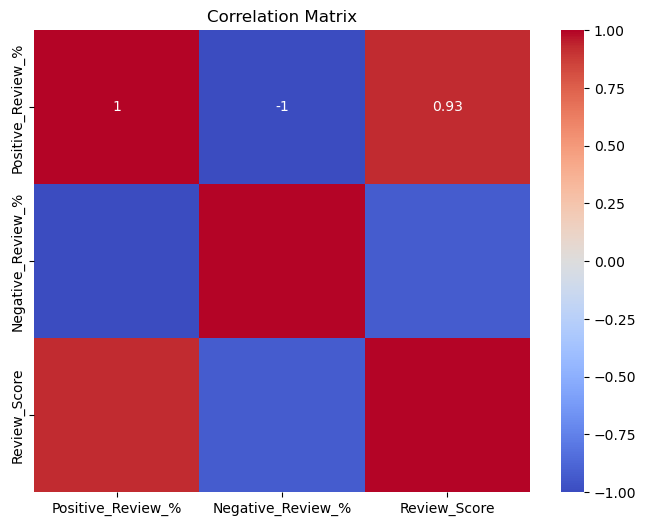

In [20]:
# Calculate correlations
correlation_matrix = data[['Positive_Review_%', 'Negative_Review_%', 'Review_Score']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Importance

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [24]:
# Prepare data
X = data[['Positive_Review_%', 'Negative_Review_%']]
y = data['Review_Score']

In [27]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')

Mean Squared Error: 28.613214614297373


In [33]:
# Feature importances

importances = model.feature_importances_
features = X.columns

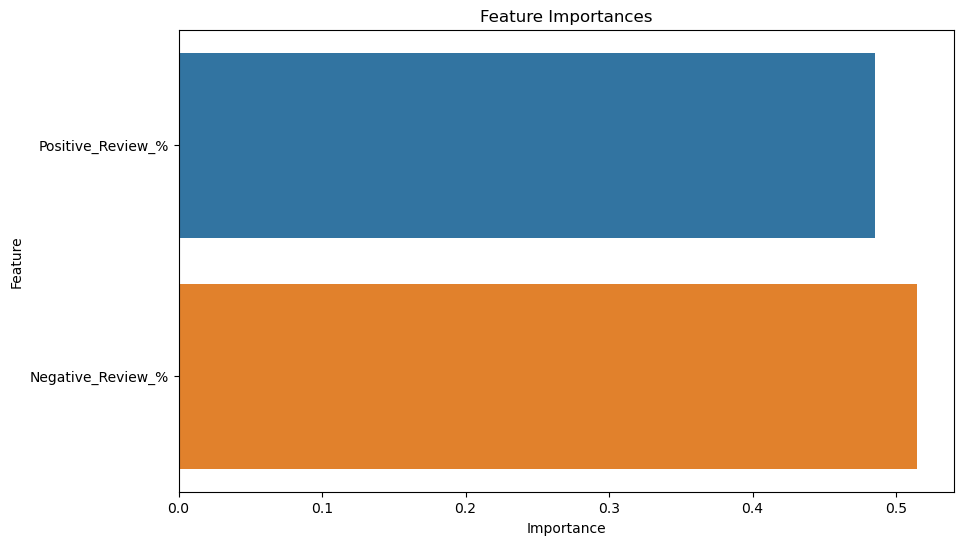

In [35]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Project Step 2: Identify the most common side effects and their associated medicines.

In [38]:
# Split the side effects column into a list
data['Side_effects'] = data['Side_effects'].str.split(',')

# Create a DataFrame where each row is a side effect and its associated medicine
side_effects_expanded = data.explode('Side_effects')

# Clean the side effects data (remove leading/trailing spaces)
side_effects_expanded['Side_effects'] = side_effects_expanded['Side_effects'].str.strip()

# Count occurrences of each side effect
side_effect_counts = side_effects_expanded['Side_effects'].value_counts()

# Display the most common side effects
side_effect_counts.head(10)  # Display top 10 common side effects

Side_effects
Application site reactions burning irritation itching and redness                                                                                                                                                                                               390
Hypoglycemia low blood glucose level Headache Nausea Diarrhea Flatulence                                                                                                                                                                                        173
No common side effects seen                                                                                                                                                                                                                                     149
Dizziness Sleepiness Tiredness Uncoordinated body movements                                                                                                                                                    

In [47]:
# Group by side effect and aggregate medicines
side_effect_medicines = side_effects_expanded.groupby('Side_effects')['Medicine Name'].apply(lambda x: ', '.join(x)).reset_index()

# Merge with side effect counts
side_effect_summary = pd.merge(side_effect_counts.reset_index(), side_effect_medicines)
side_effect_summary.columns = ['Side_effects', 'Count', 'Medicine Names']

# Display the result
side_effect_summary.head(10)  

,Side_effects,Count,Medicine Names
0,Application site reactions burning irritation ...,390,"Anovate Cream, Aziderm 20% Cream, Acivir Cream..."
1,Hypoglycemia low blood glucose level Headache ...,173,"Azulix 1 MF Tablet PR, Azulix 2 MF Tablet PR, ..."
2,No common side effects seen,149,"Aquasol A Capsule, Acton-OR Tablet SR, Anabel ..."
3,Dizziness Sleepiness Tiredness Uncoordinated b...,126,"Axogurd-SR Tablet, Axinerve-P Tablet SR, Axogu..."
4,Application site reactions burning irritation ...,118,"Afitra-L Cream, Emluz Cream, Fenza-L Cream, Fu..."
5,Nausea Abdominal pain Constipation Dizziness H...,112,"Alcros 100 Capsule, Alcros 200 Capsule, Apexit..."
6,Limited data available,98,"Aquim PF Eye Drop, Amortas Cream, Aquaray Plus..."
7,Skin peeling Application site reactions burnin...,95,"Arcolane 2% Scalp Solution, Acvaketo Soap, Der..."
8,Nausea Diarrhea Abdominal pain Hypoglycemia lo...,86,"Amaryl MV 2mg Tablet SR, Amaryl MV 1mg Tablet ..."
9,Muscle pain Weakness Headache Abdominal pain D...,82,"Arvast 10 Tablet, Advastat 10 Tablet, Azuvas 1..."


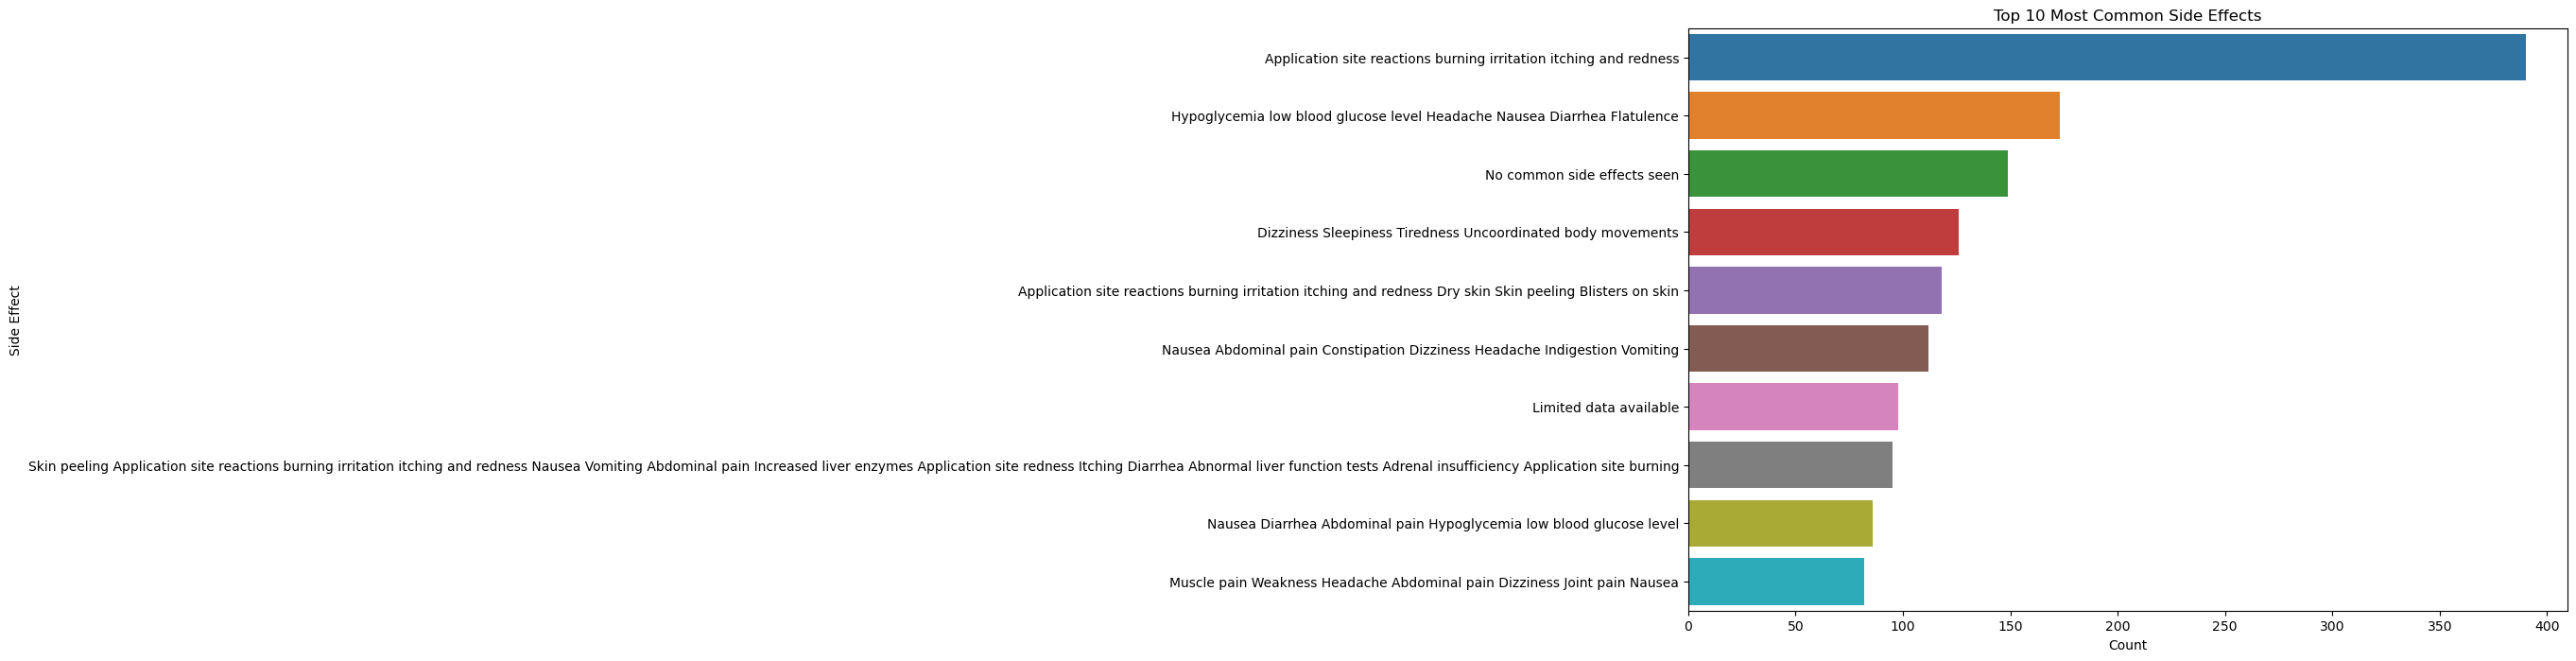

In [49]:
# Plot the most common side effects
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Side_effects', data=side_effect_summary.head(10))
plt.title('Top 10 Most Common Side Effects')
plt.xlabel('Count')
plt.ylabel('Side Effect')
plt.show()

### Project Step 3: Predict user satisfaction ratings

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
df = pd.read_csv("Medicine_Details.csv")

In [56]:
df.head()

,Medicine Name,Composition,Uses,Side_effects,Image URL,Manufacturer,Excellent Review %,Average Review %,Poor Review %
0,Avastin 400mg Injection,Bevacizumab (400mg),Cancer of colon and rectum Non-small cell lun...,Rectal bleeding Taste change Headache Noseblee...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Roche Products India Pvt Ltd,22,56,22
1,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),Treatment of Bacterial infections,Vomiting Nausea Diarrhea Mucocutaneous candidi...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
2,Azithral 500 Tablet,Azithromycin (500mg),Treatment of Bacterial infections,Nausea Abdominal pain Diarrhea,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Alembic Pharmaceuticals Ltd,39,40,21
3,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,Treatment of Cough with mucus,Nausea Vomiting Diarrhea Upset stomach Stomach...,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Glenmark Pharmaceuticals Ltd,24,41,35
4,Aciloc 150 Tablet,Ranitidine (150mg),Treatment of Gastroesophageal reflux disease (...,Headache Diarrhea Gastrointestinal disturbance,"https://onemg.gumlet.io/l_watermark_346,w_480,...",Cadila Pharmaceuticals Ltd,34,37,29


In [58]:
# Check for missing values
print(df.isnull().sum())

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Image URL             0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64


In [60]:
# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()

In [62]:
# Encode 'Medicine Name', 'Composition', 'Uses', 'Side_effects', 'Manufacturer'
df['Medicine Name'] = label_encoder.fit_transform(df['Medicine Name'])
df['Composition'] = label_encoder.fit_transform(df['Composition'])
df['Uses'] = label_encoder.fit_transform(df['Uses'])
df['Side_effects'] = label_encoder.fit_transform(df['Side_effects'])
df['Manufacturer'] = label_encoder.fit_transform(df['Manufacturer'])

In [64]:
# Define features and target variable
X = data[['Average Review %', 'Poor Review %']]
y = data['Excellent Review %'] 

In [66]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Train a model (e.g., RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [72]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [74]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [76]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [78]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.08423183932346719
R^2 Score: 0.9998706008918599
